In [48]:
# ldpc_ber.py
# Author: Mason del Rosario
# Implement BER curve for (7,4,3) Hamming code

# call libs
import numpy as np
import matplotlib.pyplot as plt
import time
from pyldpc import make_ldpc, encode, decode, get_message

In [98]:
def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff

In [70]:
# parameters for LDPC code
n = 18
d_v = 3
d_c = 6

In [72]:
# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 500
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

-> code spec: (18,12,6)
-> var deg: 3
-> check deg: 6
-> H:
 [[1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
-> G:
 [[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 1 1 0 0 1 0 0 1 1]
 [0 1 0 0 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


In [100]:
# encode/decode messages for different SNR vals
mess_num = int(1e3)
v = np.random.randint(2, size=(mess_num,k))
min_snr = .1
max_snr = 1
N = 15
snrs = np.logspace(min_snr,max_snr, N, endpoint=True)
snrs = np.arange(0,10**max_snr,0.5)
errs = np.array(())
times = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs=np.append(errs,err)
    times=np.append(times,time_tot)

C:\Anaconda3\lib\site-packages\pyldpc\decoder.py:214: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 500 - Last 500 iterations took 15.01s
SNR: 0.000 - Iter: 1000 - Last 500 iterations took 28.84s
SNR: 0.000:
 -> BER: 0.83
 -> Total Time: 43.85s
SNR: 0.500 - Iter: 500 - Last 500 iterations took 11.39s
SNR: 0.500 - Iter: 1000 - Last 500 iterations took 23.81s
SNR: 0.500:
 -> BER: 0.77
 -> Total Time: 35.20s
SNR: 1.000 - Iter: 500 - Last 500 iterations took 10.71s
SNR: 1.000 - Iter: 1000 - Last 500 iterations took 21.67s
SNR: 1.000:
 -> BER: 0.71
 -> Total Time: 32.38s
SNR: 1.500 - Iter: 500 - Last 500 iterations took 8.78s
SNR: 1.500 - Iter: 1000 - Last 500 iterations took 18.48s
SNR: 1.500:
 -> BER: 0.67
 -> Total Time: 27.26s
SNR: 2.000 - Iter: 500 - Last 500 iterations took 7.55s
SNR: 2.000 - Iter: 1000 - Last 500 iterations took 15.04s
SNR: 2.000:
 -> BER: 0.62
 -> Total Time: 22.60s
SNR: 2.500 - Iter: 500 - Last 500 iterations took 6.52s
SNR: 2.500 - Iter: 1000 - Last 500 iterations took 15.19s
SNR: 2.500:
 -> BER: 0.53
 -> Total Time: 21.70s
SNR: 3.000 - Iter: 

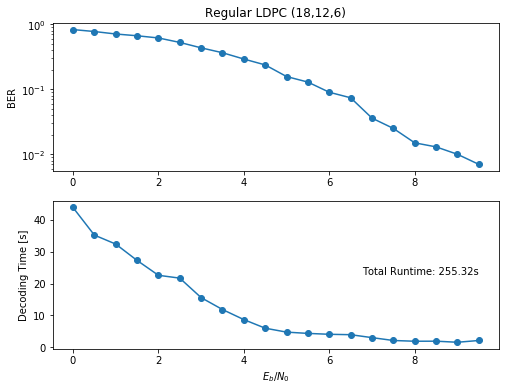

In [102]:
# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.semilogy(snrs,errs,'o-') # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Regular LDPC ({},{},{})'.format(n,k,n-k))
ax2.plot(snrs,times,'o-') # plot decode timing for different SNRs
ax2.set_xlabel('$E_b/N_0$')
ax2.set_ylabel('Decoding Time [s]')
ax2.annotate('Total Runtime: {:03.2f}s'.format(np.sum(times)),
            xy=(1, 0.35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.show()
plt.savefig('ldpc_ber_{}_{}.png'.format(n,k))